In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargar base de datos
data = pd.read_csv("brandrating.csv")
data.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [3]:
#chequeo de valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   perform  1000 non-null   int64 
 1   leader   1000 non-null   int64 
 2   latest   1000 non-null   int64 
 3   fun      1000 non-null   int64 
 4   serious  1000 non-null   int64 
 5   bargain  1000 non-null   int64 
 6   value    1000 non-null   int64 
 7   trendy   1000 non-null   int64 
 8   rebuy    1000 non-null   int64 
 9   brand    1000 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.2+ KB


In [4]:
data2 = data.copy()
data2.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


## 1.- Heatmap de correlación entre los atributos ##

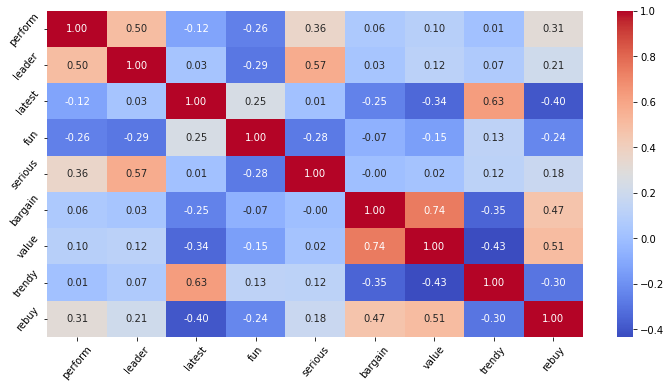

In [5]:
#Heatmap de correlación
opiniones = list(data.columns[0:9])
plt.figure(figsize=(12,6))
s = sns.heatmap(data[opiniones].corr(), annot=True, fmt=".2f", cmap="coolwarm")
s.set_yticklabels(s.get_yticklabels(), rotation=50, fontsize=10)
s.set_xticklabels(s.get_xticklabels(), rotation=50, fontsize=10)
plt.show()

## 2.- Cálculo de componentes principales (PCA) ##

In [6]:
#Estandarización de las variables
from sklearn.preprocessing import StandardScaler

In [7]:
columnas = ["perform","leader","latest","fun","serious","bargain","value","trendy","rebuy"]
features = data2[columnas]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data2[columnas] = features
data2.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,-0.77705,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714,a
1,-1.08937,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034,a
2,-0.77705,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714,a
3,-1.08937,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221,a
4,-1.08937,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221,a


In [8]:
#chequeo de valores estandarizados (media=0 y desv.est=1)
np.mean(data2), np.std(data2)

(perform   -1.563194e-16
 leader     8.526513e-17
 latest    -1.136868e-16
 fun        1.421085e-16
 serious   -5.684342e-17
 bargain   -1.136868e-16
 value      1.136868e-16
 trendy     9.947598e-17
 rebuy      4.263256e-17
 dtype: float64,
 perform    1.0
 leader     1.0
 latest     1.0
 fun        1.0
 serious    1.0
 bargain    1.0
 value      1.0
 trendy     1.0
 rebuy      1.0
 dtype: float64)

In [9]:
#Cálculo de componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
features = data2[columnas]
pca.fit(features)

PCA(n_components=9)

In [10]:
pca9 = pca.transform(features)
print(pca9)

[[ 1.01036278 -1.62300786  1.81527558 ...  0.55514877 -0.29133343
  -0.41593993]
 [-1.53720937 -1.83677187 -2.00276587 ...  0.28822721 -0.37788251
  -0.24118947]
 [ 1.21200083 -2.30192495  0.69760145 ...  0.32391032 -0.54390044
  -1.06393714]
 ...
 [-1.42307927 -2.09564259  1.43414192 ... -0.07968735 -0.52145708
  -0.02909572]
 [-2.08552324 -1.19425256 -1.27692351 ...  0.1358329  -0.24524473
   0.16700233]
 [-1.50570199  0.47303273 -0.73876216 ... -0.31377098 -0.30161079
   0.19153493]]


In [11]:
data2[columnas] = features
print(pca9.shape)

(1000, 9)


### 2.1.- ¿Cuál es la proporción de la varianza explicada acumulada hasta el componente principal 3? ###

In [12]:
#Cálculo de la proporción de la varianza explicada por cada PCA
print("Varianza explicada PCA")
expl = pca.explained_variance_ratio_
print(expl)
print("suma:", sum(expl[0:3]))

Varianza explicada PCA
[0.33103284 0.23295019 0.11991721 0.08080122 0.07083844 0.05942703
 0.04334494 0.03467182 0.02701632]
suma: 0.6839002346857317


#### Hasta el componente principal 3 se obtiene el 68% de la varianza explicada. ####

## 3.- Grafique la varianza explicada para 9 componentes principales ###

Text(0, 0.5, 'Varianza explicada acumulada')

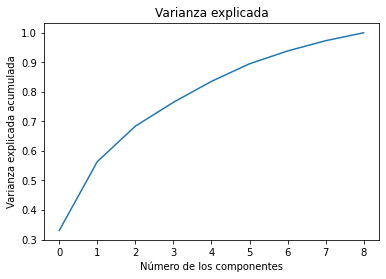

In [13]:
#Gráfico de varianza acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Varianza explicada")
plt.xlabel("Número de los componentes")
plt.ylabel("Varianza explicada acumulada")


## 4.- Crear un dataframe y heatmap con con los componentes principales y los atributos ##

### 4.a Reduciendo a 3 componentes principales ###

In [14]:
#Reducción a 3 variables
pca3 = PCA(n_components=3)
pca3.fit(features)
pca_3 = pca3.transform(features)
pca_3.shape

(1000, 3)

<AxesSubplot:>

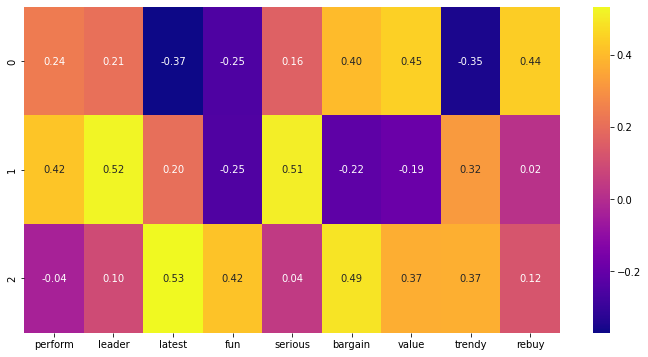

In [15]:
data_comp = pd.DataFrame(pca3.components_,columns=list(features))
plt.figure(figsize=(12,6))
sns.heatmap(data_comp, annot=True, fmt=".2f", cmap="plasma")

### 4.a.1 ¿Qué significa que el valor en la celda "componente principal 2"/"leader", sea alto?¿Qué valor es? ###
#### La celda del componente principal 2 (en el gráfico n=1) con el atributo "leader" tienen un valor alto, lo que indica que el atributo "leader" de las tiendas tiene una alta influencia en el componente principal 2, siendo la que más aporta en dicho PC. Su valor es de 0.52. ####

### 4.b Trabajando con 9 componentes principales ###

<AxesSubplot:>

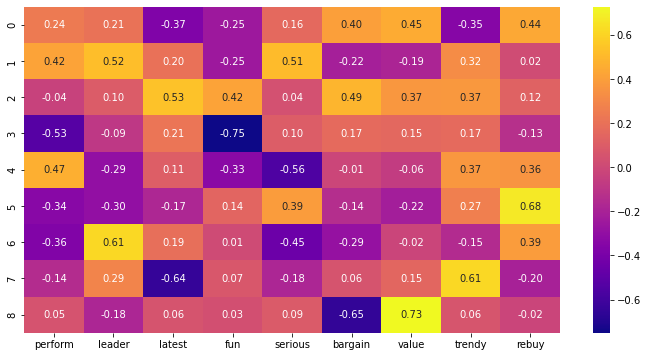

In [16]:
data_comp = pd.DataFrame(pca.components_,columns=list(features))
plt.figure(figsize=(12,6))
sns.heatmap(data_comp, annot=True, fmt=".2f", cmap="plasma")

### 4.b.1 ¿Qué significa que el valor en la celda "componente principal 2"/"leader", sea alto?¿Qué valor es? ###
#### La celda del componente principal 2 (en el gráfico n=1) con el atributo "leader" tienen un valor alto, lo que indica que el atributo "leader" de las tiendas tiene una alta influencia en el componente principal 2. El atributo que más aporta en dicho PC es leader, pero el PC en el que más influye el atributo "leader" es al PC7 (en el gráfico n=6). Su valor es de 0.52 en PC2/leader. ####

## 5.- Utilizando el promedio como agregación ¿Cuáles son los atributos dónde la marca e es mejor que la marca a? ##

In [17]:
#Cálculo del promedio de los atributos
promedio = data.groupby(["brand"], as_index = False).mean()
promedio[(promedio["brand"]=='a') | (promedio["brand"]=='e')]

,brand,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
4,e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82


#### La marca e es mejor en todos los atributos en comparación con la marca a, exceptuando "fun", donde la marca a es mejor, por prácticamente 1 punto. ###